**Ketua Kelompok G:**
- Ibnullabib - 11220940000037

**Anggota Kelompok G:**
1. Reyhan Maulana Aryaduta - 11220940000048
2. Anjini Eva Nurhayati - 11220940000022
3. Raynaldi Ilham Nanda Nur Pratama - 11210940000055
4. Baharuddin Saefullah Asyubanji - 11220940000001

# **Loading Data**

In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

# **Preprocessing**

## **JAKARTA**

In [ ]:
dfJ.head(5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

###**Menghapus variabel yang tidak diperlukan**

In [ ]:
dfJ.drop(columns= dfJ.columns[14:26], inplace=True) # Menghilangkan kolom unnamed yang berisi NaN
dfJ.drop(range(121, 1024), inplace = True) # Menghilangkan baris yang berisi NaN di semua kolom
print(dfJ.info())
dfJ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  121 non-null    object 
 1   LT          121 non-null    float64
 2   LB          121 non-null    float64
 3   KT          121 non-null    float64
 4   KM          121 non-null    float64
 5   garasi      44 non-null     float64
 6   carport     90 non-null     float64
 7   lokasi      121 non-null    object 
 8   sertifikat  119 non-null    object 
 9   listrik     120 non-null    float64
 10  hadap       36 non-null     object 
 11  harga       121 non-null    float64
 12  URL         121 non-null    object 
 13  deskripsi   112 non-null    object 
dtypes: float64(8), object(6)
memory usage: 13.4+ KB
None


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [ ]:
dfJ.drop(columns=['created_at', 'URL', 'hadap'], inplace = True) # Menghapus kolom yang sekiranya tidak diperlukan
dfJ

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
0,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,4.500000e+09,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,"Mengusung konsep minimalis, dan didukung denga..."
2,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,3.950000e+08,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...
116,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,3.850000e+09,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,8.800000e+08,Rumah Signature Location & Access :\n• 2 Menit...
118,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


### **Menghapus duplikasi**

In [ ]:
dfJ.duplicated().sum() # memeriksa duplikasi

0

### **Mengecek Outlier**

In [ ]:
dfJ.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,121.000000,121.000000,121.000000,121.000000,44.000000,90.000000,120.000000,1.210000e+02
mean,247.586777,279.495868,4.272727,3.380165,1.863636,1.955556,5425.000000,8.985955e+09
std,368.384642,285.275631,1.901754,1.709075,1.518734,1.475730,7891.589502,1.587610e+10
min,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,900.000000,3.800000e+08
25%,84.000000,97.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,1.600000e+09
50%,135.000000,200.000000,4.000000,3.000000,1.000000,2.000000,3500.000000,3.400000e+09
75%,250.000000,350.000000,5.000000,4.000000,2.000000,2.000000,4425.000000,7.250000e+09
max,3422.000000,2000.000000,10.000000,10.000000,8.000000,10.000000,66000.000000,1.050000e+11


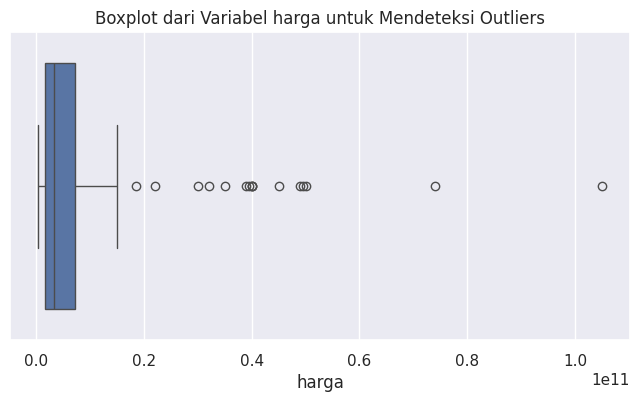

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfJ["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

In [ ]:
Q1_dfJ = dfJ["harga"].quantile(0.25)
Q3_dfJ = dfJ["harga"].quantile(0.75)
IQR_dfJ = Q3_dfJ - Q1_dfJ #IQR is interquartile range.

no_out_dfJ = (dfJ["harga"] >= Q1_dfJ - 1.5 * IQR_dfJ) & (dfJ["harga"] <= Q3_dfJ + 1.5 *IQR_dfJ)

dfJ_new = dfJ[no_out_dfJ] # data yang sudah tidak ada outlier

dfJ_out = dfJ[~no_out_dfJ] # data outlier

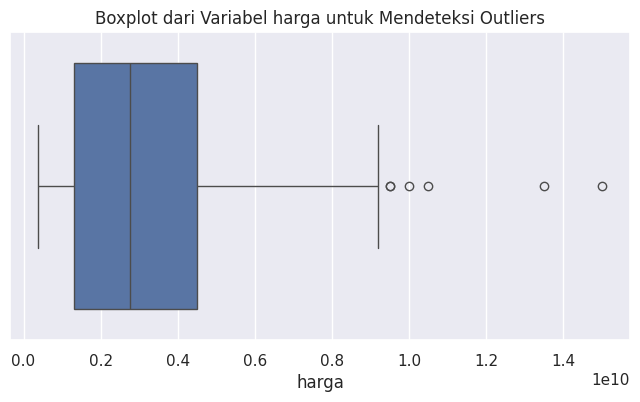

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfJ_new["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

### **Mengecek missing value**

In [ ]:
print(dfJ_new.isnull().sum())

LT             0
LB             0
KT             0
KM             0
garasi        70
carport       29
lokasi         0
sertifikat     2
listrik        0
harga          0
deskripsi      9
dtype: int64


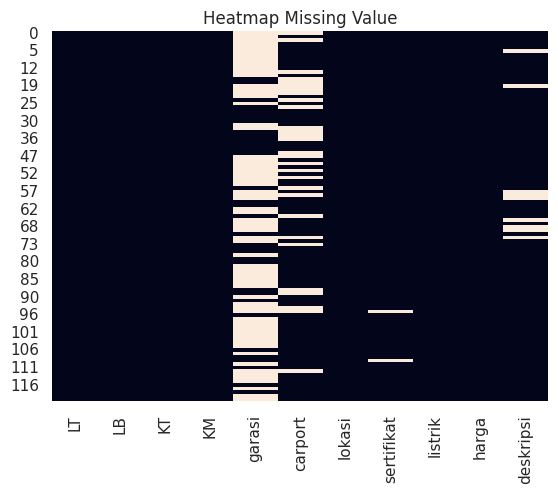

In [ ]:
sns.heatmap(dfJ_new.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
dfJ_new['garasi'].fillna(0, inplace=True) # mengganti nilai NaN dengan 0
dfJ_new['carport'].fillna(0, inplace=True) # mengganti nilai NaN dengan 0
dfJ_new['deskripsi'].fillna('tidak ada deskripsi', inplace=True)

dfJ_new = dfJ_new.dropna(subset=['sertifikat']) # menghapus baris yang tidak memiliki sertifikat

In [ ]:
print(dfJ_new.isnull().sum())

LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
deskripsi     0
dtype: int64


### **Mengoreksi tipe data**

In [ ]:
dfJ_new['KT'] = dfJ_new['KT'].astype('int64')
dfJ_new['KM'] = dfJ_new['KM'].astype('int64')
dfJ_new['garasi'] = dfJ_new['garasi'].astype('int64')
dfJ_new['carport'] = dfJ_new['carport'].astype('int64')
dfJ_new['lokasi'] = dfJ_new['lokasi'].astype('category')
dfJ_new['sertifikat'] = dfJ_new['sertifikat'].astype('category')

In [ ]:
dfJ_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 120
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LT          103 non-null    float64 
 1   LB          103 non-null    float64 
 2   KT          103 non-null    int64   
 3   KM          103 non-null    int64   
 4   garasi      103 non-null    int64   
 5   carport     103 non-null    int64   
 6   lokasi      103 non-null    category
 7   sertifikat  103 non-null    category
 8   listrik     103 non-null    float64 
 9   harga       103 non-null    float64 
 10  deskripsi   103 non-null    object  
dtypes: category(2), float64(4), int64(4), object(1)
memory usage: 8.8+ KB


##**DEPOK**

In [ ]:
#Tipe data
print(type(dfT))

# Ukuran data
N_dfD, P_dfD = dfD.shape
print(f"baris = {N_dfD}, kolom = {P_dfD}")

<class 'pandas.core.frame.DataFrame'>
baris = 998, kolom = 26


In [ ]:
# Melihat 7 data Pertama
dfD.head(7)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6-12-2021,40,30.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Melihat 5 Data Terakhir
dfD.tail(5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Menghapus variabel**

In [ ]:
# Melihat Nama Variabel
dfD.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Menghapus Variabel
dfD.drop(['created_at', 'hadap', 'URL', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)

In [ ]:
# Mengampilkan Data dan Mengecek Variabel yang telah dihapus
N1_dfD, P1_dfD = dfD.shape
print(f"Baris dan kolom sesudah dihapus: baris = {N_dfD}, kolom = {P_dfD}")
print(f"Baris dan kolom sesudah dihapus: baris = {N1_dfD}, kolom = {P1_dfD}")

Baris dan kolom sesudah dihapus: baris = 998, kolom = 26
Baris dan kolom sesudah dihapus: baris = 998, kolom = 11


### **Menghapus duplikasi**

In [ ]:
print(dfD.shape)
dfD.duplicated().sum()
# Terdapat sebanyak 884 data duplikasi

(998, 11)


884

In [ ]:
# Menghapus duplikasi
dfD.drop_duplicates(inplace=True)

In [ ]:
print(dfT.shape)
dfD.duplicated().sum()
# Duplicate sudah terhapus

(128, 26)


0

In [ ]:
dfD.describe()

,LB,KT,KM,garasi,carport,listrik,harga
count,111.000000,111.000000,111.000000,25.000000,94.000000,103.000000,111.000000
mean,94.117117,2.756757,1.909910,1.760000,1.670213,2147.572816,1212.306306
std,94.923581,1.046346,0.939531,1.392839,1.061428,1166.261386,1508.852561
min,15.000000,2.000000,1.000000,1.000000,1.000000,900.000000,41.000000
25%,46.000000,2.000000,1.000000,1.000000,1.000000,1300.000000,487.500000
50%,61.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,810.000000
75%,100.000000,3.000000,2.000000,2.000000,2.000000,2200.000000,1100.000000
max,600.000000,7.000000,5.000000,6.000000,7.000000,10000.000000,9000.000000


### **Mengecek noise & outlier**

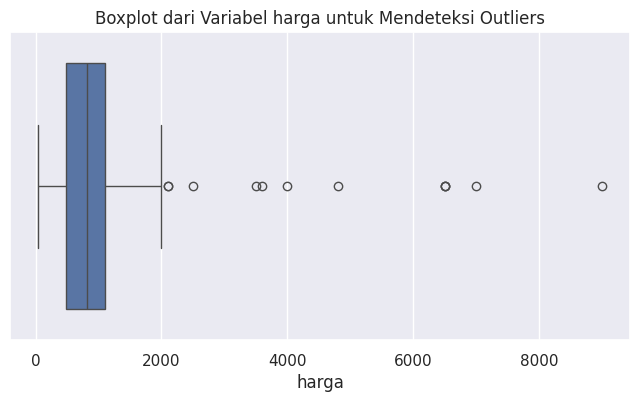

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfD["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

In [ ]:
Q1_dfD = dfD["harga"].quantile(0.25)
Q3_dfD = dfD["harga"].quantile(0.75)
IQR_dfD = Q3_dfD - Q1_dfD #IQR is interquartile range.

no_out_dfD = (dfD["harga"] >= Q1_dfD - 1.5 * IQR_dfD) & (dfD["harga"] <= Q3_dfD + 1.5 *IQR_dfD)

dfD_new = dfD[no_out_dfD] # data yang sudah tidak ada outlier

dfD_out = dfD[~no_out_dfD] # data outlier

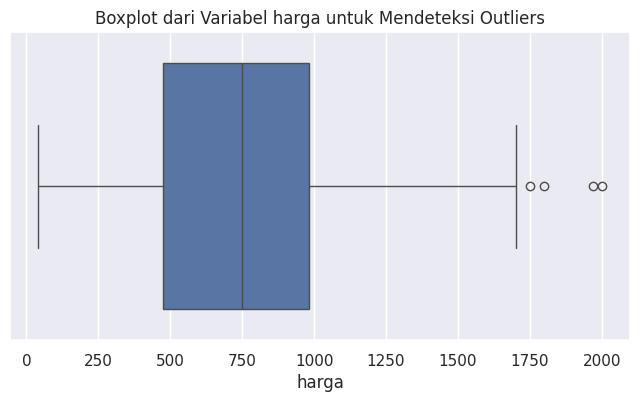

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfD_new["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

### **Mengecek Missing Value**

In [ ]:
print(dfD_new.isnull().sum())

LT             0
LB             0
KT             0
KM             0
garasi        82
carport       16
lokasi         0
sertifikat     0
listrik        7
harga          0
deskripsi      0
dtype: int64


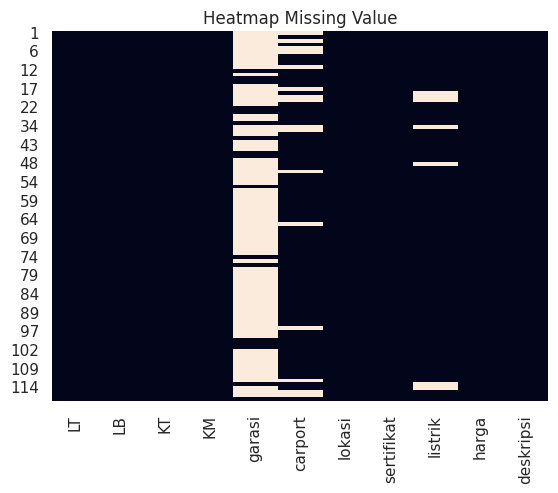

In [ ]:
sns.heatmap(dfD_new.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
# Mengimputasi NaN dengan 0 dengan asumsi
dfD_new.fillna(0, inplace=True)

In [ ]:
print(dfD_new.isnull().sum())

LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
deskripsi     0
dtype: int64


### **Mengoreksi tipe data**

In [ ]:
dfD_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 1 to 117
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          99 non-null     object 
 1   LB          99 non-null     float64
 2   KT          99 non-null     float64
 3   KM          99 non-null     float64
 4   garasi      99 non-null     float64
 5   carport     99 non-null     float64
 6   lokasi      99 non-null     object 
 7   sertifikat  99 non-null     object 
 8   listrik     99 non-null     float64
 9   harga       99 non-null     float64
 10  deskripsi   99 non-null     object 
dtypes: float64(7), object(4)
memory usage: 9.3+ KB


In [ ]:
dfD_new['LT'] = dfD_new['LT'].astype('float64')
dfD_new['KT'] = dfD_new['KT'].astype('int64')
dfD_new['KM'] = dfD_new['KM'].astype('int64')
dfD_new['garasi'] = dfD_new['garasi'].astype('int64')
dfD_new['carport'] = dfD_new['carport'].astype('int64')
dfD_new['lokasi'] = dfD_new['lokasi'].astype('category')
dfD_new['sertifikat'] = dfD_new['sertifikat'].astype('category')

In [ ]:
dfD_new.dtypes

,0
LT,float64
LB,float64
KT,int64
KM,int64
garasi,int64
carport,int64
lokasi,category
sertifikat,category
listrik,float64
harga,float64


##**BOGOR**

In [ ]:
dfB.head(5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Melihat tipe variabel data Bogor
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   193 non-null    object 
 1   LT           193 non-null    float64
 2   LB           193 non-null    float64
 3   KT           193 non-null    float64
 4   KM           193 non-null    float64
 5   garasi       193 non-null    float64
 6   carport      193 non-null    float64
 7   lokasi       193 non-null    object 
 8   sertifikat   193 non-null    object 
 9   listrik      193 non-null    float64
 10  hadap        19 non-null     object 
 11  harga        193 non-null    float64
 12  URL          193 non-null    object 
 13  deskripsi    193 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
# Hapus variabel yang tidak diperlukan
dfB.drop(['created_at','hadap','Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25','URL'], axis = 1, inplace = True)

In [ ]:
# Mengecek kembali variabel datanya sudah terhapus atau belum
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          193 non-null    float64
 1   LB          193 non-null    float64
 2   KT          193 non-null    float64
 3   KM          193 non-null    float64
 4   garasi      193 non-null    float64
 5   carport     193 non-null    float64
 6   lokasi      193 non-null    object 
 7   sertifikat  193 non-null    object 
 8   listrik     193 non-null    float64
 9   harga       193 non-null    float64
 10  deskripsi   193 non-null    object 
dtypes: float64(8), object(3)
memory usage: 86.0+ KB


In [ ]:
# Mengecek duplikasi
dfB.duplicated().sum()

805

In [ ]:
# Menghapus duplikat
dfB.drop_duplicates(inplace=True)

In [ ]:
# Mengecek kembali duplikasi
dfB.duplicated().sum()

0

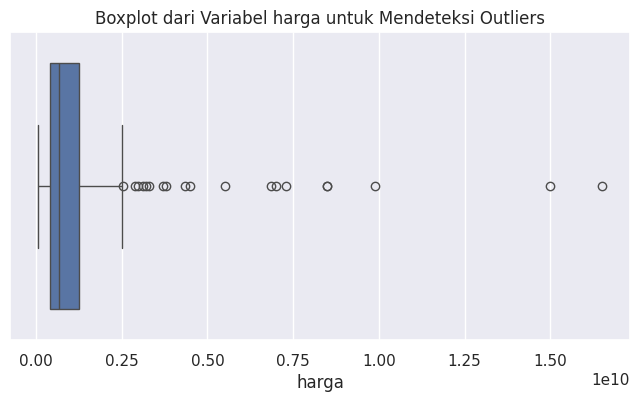

In [ ]:
# Mengecek outlier
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfB["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

In [ ]:
# Menhapus outliers
Q1_dfB = dfB["harga"].quantile(0.25)
Q3_dfB = dfB["harga"].quantile(0.75)
IQR_dfB = Q3_dfB - Q1_dfB #IQR_dfB is interquartile range.

no_out_dfB = (dfB["harga"] >= Q1_dfB - 1.5 * IQR_dfB) & (dfB["harga"] <= Q3_dfB + 1.5 *IQR_dfB)

dfB_new = dfB[no_out_dfB] # data yang sudah tidak ada outlier

dfB_out = dfB[~no_out_dfB] # data outlier

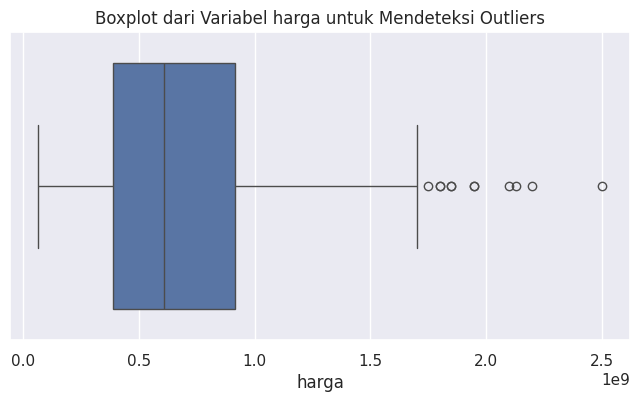

In [ ]:
# Mengecek outlier
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfB_new["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

In [ ]:
# Mengecek missing value
dfB_new.isnull().sum()

# Terlihat bahwa tidak terdapat missing value

,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0
harga,0


In [ ]:
# Mengecek tipe variabel
dfB_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 192
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          174 non-null    float64
 1   LB          174 non-null    float64
 2   KT          174 non-null    float64
 3   KM          174 non-null    float64
 4   garasi      174 non-null    float64
 5   carport     174 non-null    float64
 6   lokasi      174 non-null    object 
 7   sertifikat  174 non-null    object 
 8   listrik     174 non-null    float64
 9   harga       174 non-null    float64
 10  deskripsi   174 non-null    object 
dtypes: float64(8), object(3)
memory usage: 16.3+ KB


In [ ]:
# Mengoreksi tipe variabel
dfB_new['KT'] = dfB_new['KT'].astype('int64')
dfB_new['KM'] = dfB_new['KM'].astype('int64')
dfB_new['garasi'] = dfB_new['garasi'].astype('int64')
dfB_new['carport'] = dfB_new['carport'].astype('int64')
dfB_new['lokasi'] = dfB_new['lokasi'].astype('category')
dfB_new['sertifikat'] = dfB_new['sertifikat'].astype('category')

In [ ]:
print(dfB_new.dtypes)

LT             float64
LB             float64
KT               int64
KM               int64
garasi           int64
carport          int64
lokasi        category
sertifikat    category
listrik        float64
harga          float64
deskripsi       object
dtype: object


##**TANGERANG**

In [ ]:
#Tipe data
print(type(dfT))

# Ukuran data
N_dfT, P_dfT = dfT.shape
print(f"baris = {N_dfT}, kolom = {P_dfT}")

<class 'pandas.core.frame.DataFrame'>
baris = 128, kolom = 26


In [ ]:
# "Mengintip" 5 data pertama
dfT.head(5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# "Mengintip" 7 data terakhir
dfT.tail(7)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Menghapus variabel**

In [ ]:
# Melihat kolom atau variabel apa saja yang ada di data
dfT.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Menghapus variabel yang tidak diperlukan
dfT.drop(['created_at','hadap','URL',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)

In [ ]:
# Mengecek kembali data yang sudah dihapus variabelnya`
N1_dfT, P1_dfT = dfT.shape
print(f"Baris dan kolom sesudah dihapus: baris = {N_dfT}, kolom = {P_dfT}")
print(f"Baris dan kolom sesudah dihapus: baris = {N1_dfT}, kolom = {P1_dfT}")

Baris dan kolom sesudah dihapus: baris = 128, kolom = 26
Baris dan kolom sesudah dihapus: baris = 128, kolom = 11


### **Menghapus duplikasi**

In [ ]:
dfT.duplicated().sum()
# Terdapat 5 duplikasi

3

In [ ]:
# Menghapus duplikasi
dfT.drop_duplicates(inplace=True)

In [ ]:
print(dfT.shape)
dfT.duplicated().sum()
# Duplicate sudah terhapus

(125, 11)


0

In [ ]:
dfT.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,124.000000,124.000000,124.000000,124.000000,38.000000,92.000000,111.000000,124.000000
mean,202.653226,199.491935,3.346774,2.693548,2.210526,1.608696,3962.162162,3849.556452
std,285.219301,264.097681,1.097257,1.295253,1.862255,1.222109,6757.743761,9316.413817
min,37.000000,27.000000,2.000000,1.000000,1.000000,1.000000,1300.000000,95.000000
25%,90.000000,81.500000,3.000000,2.000000,1.000000,1.000000,2200.000000,1037.500000
50%,150.500000,125.000000,3.000000,2.000000,2.000000,1.000000,2200.000000,1950.000000
75%,250.000000,240.000000,4.000000,3.000000,2.000000,2.000000,3500.000000,3775.000000
max,3087.000000,2500.000000,8.000000,8.000000,10.000000,10.000000,66000.000000,100000.000000


### **Mengecek noise & outlier**

Dari statistika deskriptif kami melihat bahwa terjadi penyimpangan yang jauh  antara min, max, dan mean pada variabel harga dan listrik

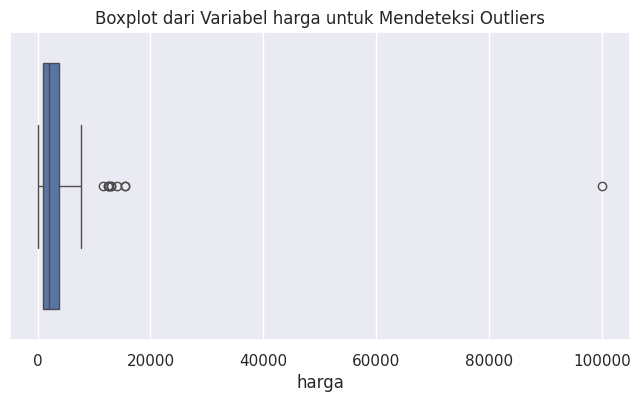

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfT["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

Memisahkan outlier pada variabel

In [ ]:
Q1_dfT = dfT["harga"].quantile(0.25)
Q3_dfT = dfT["harga"].quantile(0.75)
IQR = Q3_dfT - Q1_dfT #IQR is interquartile range.

no_out_dfT = (dfT["harga"] >= Q1_dfT - 1.5 * IQR) & (dfT["harga"] <= Q3_dfT + 1.5 *IQR)

dfT_new = dfT[no_out_dfT] # data yang sudah tidak ada outlier

dfT_out = dfT[~no_out_dfT] # data outlier

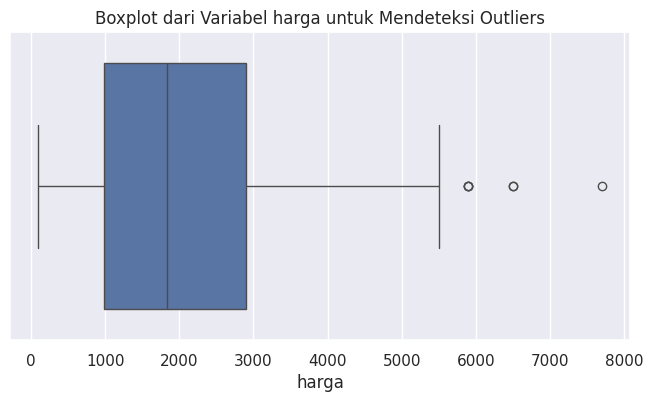

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfT_new["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

### **Mengecek missing value**

In [ ]:
print(dfT_new.isnull().sum())

LT             0
LB             0
KT             0
KM             0
garasi        82
carport       29
lokasi         0
sertifikat     0
listrik       12
harga          0
deskripsi      0
dtype: int64


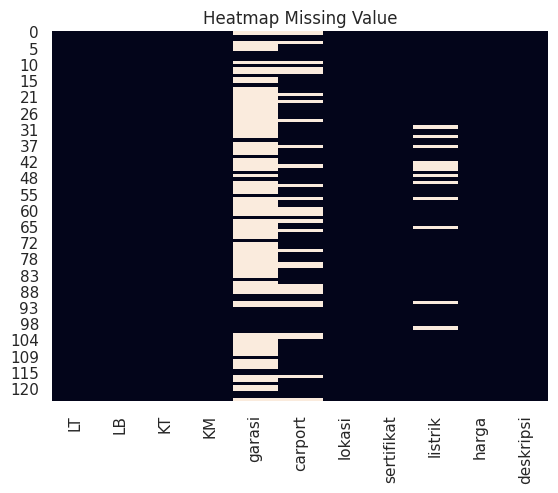

In [ ]:
sns.heatmap(dfT_new.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
# Mengimputasi NaN dengan 0
dfT_new.fillna(0, inplace=True)

In [ ]:
print(dfT_new.isnull().sum())

LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
deskripsi     0
dtype: int64


### **Mengoreksi tipe data**

In [ ]:
dfT_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 123
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          114 non-null    float64
 1   LB          114 non-null    float64
 2   KT          114 non-null    float64
 3   KM          114 non-null    float64
 4   garasi      114 non-null    float64
 5   carport     114 non-null    float64
 6   lokasi      114 non-null    object 
 7   sertifikat  114 non-null    object 
 8   listrik     114 non-null    float64
 9   harga       114 non-null    float64
 10  deskripsi   114 non-null    object 
dtypes: float64(8), object(3)
memory usage: 10.7+ KB


In [ ]:
dfT_new['KT'] = dfT_new['KT'].astype('int64')
dfT_new['KM'] = dfT_new['KM'].astype('int64')
dfT_new['garasi'] = dfT_new['garasi'].astype('int64')
dfT_new['carport'] = dfT_new['carport'].astype('int64')
dfT_new['lokasi'] = dfT_new['lokasi'].astype('category')
dfT_new['sertifikat'] = dfT_new['sertifikat'].astype('category')

In [ ]:
dfT_new.dtypes

,0
LT,float64
LB,float64
KT,int64
KM,int64
garasi,int64
carport,int64
lokasi,category
sertifikat,category
listrik,float64
harga,float64


##**BEKASI**

In [ ]:
# Melihat jenis tipe data Bekasi
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
# Menghapus beberapa kolom yang dirasa tidak dibutuhkan
dfX.drop(['created_at','URL', 'hadap', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
          'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
          'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)

In [ ]:
dfX2 = dfX
dfX2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          107 non-null    float64
 1   LB          107 non-null    float64
 2   KT          107 non-null    float64
 3   KM          106 non-null    float64
 4   garasi      33 non-null     float64
 5   carport     81 non-null     float64
 6   lokasi      107 non-null    object 
 7   sertifikat  106 non-null    object 
 8   listrik     101 non-null    float64
 9   harga       107 non-null    float64
 10  deskripsi   107 non-null    object 
dtypes: float64(8), object(3)
memory usage: 85.4+ KB


In [ ]:
# Menghapus entri yang memiliki data duplikat
dfX2.drop_duplicates(inplace = True)
dfX2.duplicated().sum()
print(dfX2.shape)

(108, 11)


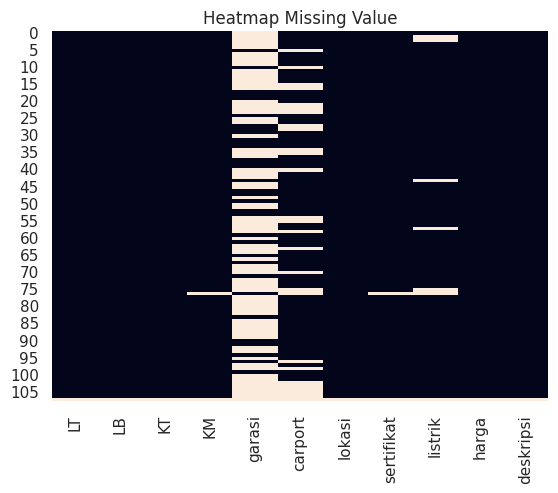

In [ ]:
# Melihat missing value pada data Bekasi
sns.heatmap(dfX2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
# Mengganti nilai NaN dengan nilai 0 pada data
dfX2['garasi'].fillna(0, inplace=True)

In [ ]:
dfX2['carport'].fillna(0, inplace=True)

In [ ]:
dfX2['listrik'].fillna(0, inplace=True)

In [ ]:
# Menghapus Missing value minimal satu di salah satu kolom, maka baris di hapus
dfX2.dropna().sum()
dfX2.dropna(inplace = True)

In [ ]:
dfX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 106
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          106 non-null    float64
 1   LB          106 non-null    float64
 2   KT          106 non-null    float64
 3   KM          106 non-null    float64
 4   garasi      106 non-null    float64
 5   carport     106 non-null    float64
 6   lokasi      106 non-null    object 
 7   sertifikat  106 non-null    object 
 8   listrik     106 non-null    float64
 9   harga       106 non-null    float64
 10  deskripsi   106 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.9+ KB


In [ ]:
dfX2['KT'] = dfX2['KT'].astype('int64')
dfX2['KM'] = dfX2['KM'].astype('int64')
dfX2['garasi'] = dfX2['garasi'].astype('int64')
dfX2['carport'] = dfX2['carport'].astype('int64')
dfX2['lokasi'] = dfX2['lokasi'].astype('category')
dfX2['sertifikat'] = dfX2['sertifikat'].astype('category')

In [ ]:
dfX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 106
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LT          106 non-null    float64 
 1   LB          106 non-null    float64 
 2   KT          106 non-null    int64   
 3   KM          106 non-null    int64   
 4   garasi      106 non-null    int64   
 5   carport     106 non-null    int64   
 6   lokasi      106 non-null    category
 7   sertifikat  106 non-null    category
 8   listrik     106 non-null    float64 
 9   harga       106 non-null    float64 
 10  deskripsi   106 non-null    object  
dtypes: category(2), float64(4), int64(4), object(1)
memory usage: 8.7+ KB


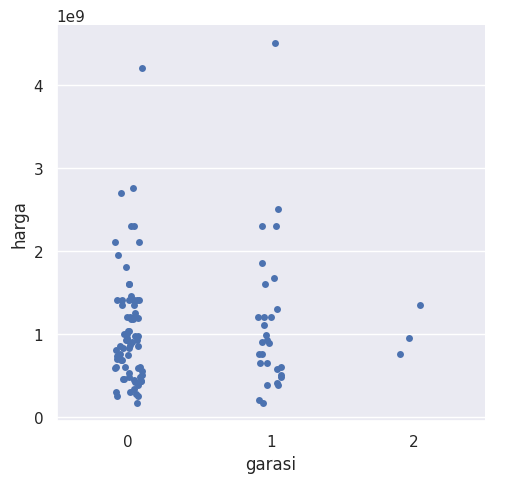

In [ ]:
b = sns.catplot(x = "garasi", y = "harga", data = dfX2)

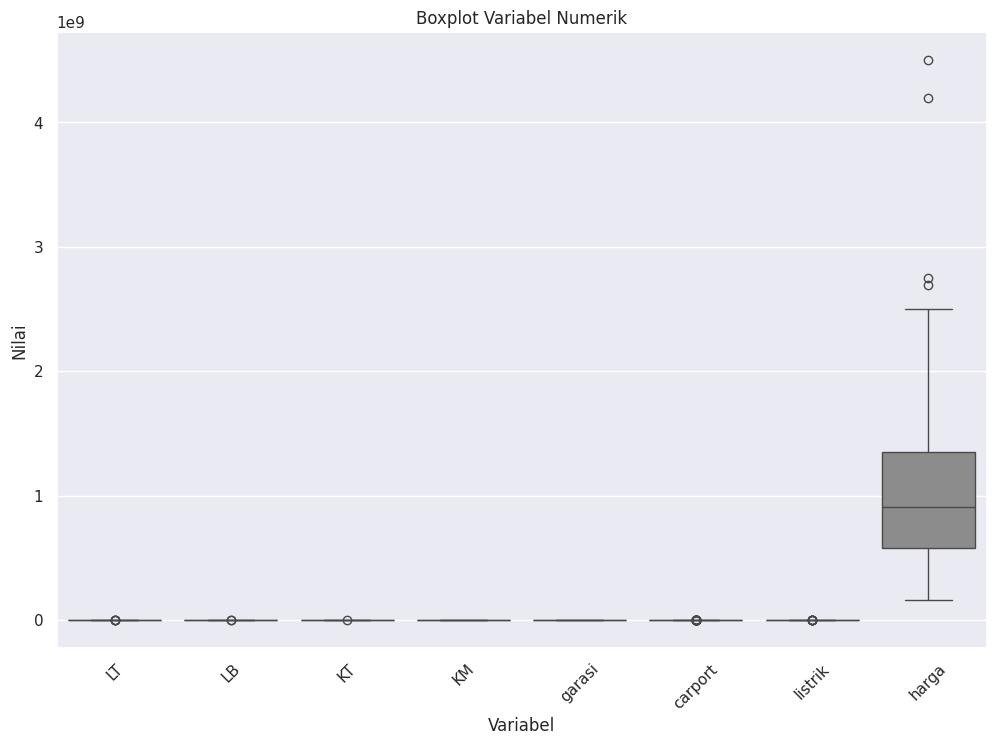

In [ ]:
# Memilih kolom-kolom numerik saja
numeric_columns = dfX2.select_dtypes(include='number')

# Memunculkan boxplot untuk semua variabel numerik
plt.figure(figsize=(12, 8))  # Ukuran gambar boxplot
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)  # Memutar label sumbu x untuk membaca lebih baik
plt.title('Boxplot Variabel Numerik')
plt.xlabel('Variabel')
plt.ylabel('Nilai')
plt.show()

In [ ]:
# Mendefinisikan fungsi untuk menghapus pencilan berdasarkan IQR
def remove_outliers_iqr(dfX2, columns):
    for col in columns:
        Q1 = dfX2[col].quantile(0.25)  # Kuartil pertama
        Q3 = dfX2[col].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Rentang Interquartile

        # Menghitung batas bawah dan atas untuk mengidentifikasi pencilan
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menghapus data di luar IQR untuk variabel tertentu
        #dfX2 = dfX2[(dfX2[col] >= lower_bound) & (dfX2[col] <= upper_bound)]

    return dfX2

# Menentukan kolom yang akan diproses
columns_to_process = ['LT', 'LB', 'KT', 'KM', 'listrik', 'harga']

# Menghapus noise di luar IQR untuk kolom yang ditentukan
dfX2 = remove_outliers_iqr(dfX2, columns_to_process)

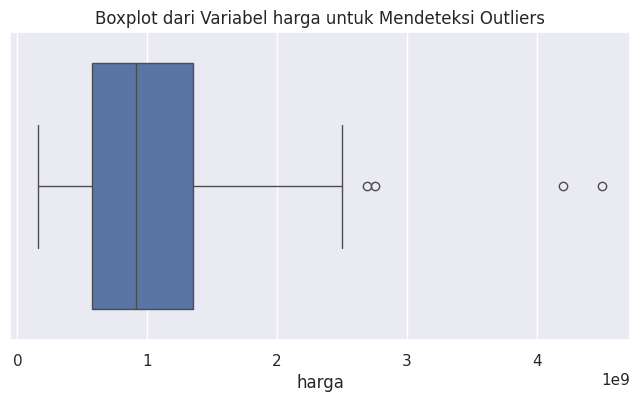

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfX2["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

# **Overview dari semua data yang sudah di bersihkan**

## **JAKARTA**

In [ ]:
print(dfJ_new.shape)
dfJ_new.tail(5)
# disini terlihat bahwa baris dengan indeksnya tidak sama, maka kita harus reset index

(103, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
116,220.0,239.0,5,4,1,2,Jakarta Timur,PPJB,3500.0,3.850000e+09,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,70.0,57.0,3,2,0,2,Jakarta Timur,SHM,2200.0,8.800000e+08,Rumah Signature Location & Access :\n• 2 Menit...
118,315.0,280.0,4,3,1,2,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,135.0,190.0,5,5,0,2,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
120,144.0,250.0,5,5,0,2,Jakarta Timur,SHM,3500.0,2.250000e+09,Rumah Modern Minimalis dengan 2 lantai di Jati...


In [ ]:
dfJ_new.reset_index(drop=True, inplace=True)

In [ ]:
print(dfJ_new.shape)
dfJ_new.tail(5)

(103, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
98,220.0,239.0,5,4,1,2,Jakarta Timur,PPJB,3500.0,3.850000e+09,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
99,70.0,57.0,3,2,0,2,Jakarta Timur,SHM,2200.0,8.800000e+08,Rumah Signature Location & Access :\n• 2 Menit...
100,315.0,280.0,4,3,1,2,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
101,135.0,190.0,5,5,0,2,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
102,144.0,250.0,5,5,0,2,Jakarta Timur,SHM,3500.0,2.250000e+09,Rumah Modern Minimalis dengan 2 lantai di Jati...


In [ ]:
dfJ_new.describe(include='all')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103,103,103.00000,1.030000e+02,103
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,7,NaN,NaN,95
top,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta Barat,SHM,NaN,NaN,tidak ada deskripsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,24,78,NaN,NaN,9
mean,197.126214,210.621359,4.135922,3.223301,0.524272,1.213592,NaN,NaN,3928.15534,3.612433e+09,NaN
std,358.630228,153.585712,1.842039,1.644552,0.927200,1.035171,NaN,NaN,4035.66010,2.993773e+09,NaN
min,16.000000,21.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,900.00000,3.800000e+08,NaN
25%,73.500000,82.500000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,2200.00000,1.305000e+09,NaN
50%,124.000000,198.000000,4.000000,3.000000,0.000000,1.000000,NaN,NaN,3500.00000,2.750000e+09,NaN
75%,201.000000,277.500000,5.000000,4.000000,1.000000,2.000000,NaN,NaN,4400.00000,4.625000e+09,NaN


## **DEPOK**

In [ ]:
print(dfD_new.shape)
dfD_new.tail(5)
# disini terlihat bahwa baris dengan indeksnya tidak sama, maka kita harus reset index

(99, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
113,79.0,115.0,2,1,1,1,Sukmajaya,SHM,0.0,750.0,Rumah di Depok Timur
114,72.0,45.0,2,1,0,1,Cimanggis,SHM,0.0,1000.0,PERUMAHAN NUANSA PERMAI DEPOK
115,40.0,40.0,2,1,0,0,Cipayung,SHM,1300.0,195.0,rumah semi minimalis manis harga ekonomis di c...
116,50.0,50.0,2,1,0,0,Cipayung,SHM,1300.0,185.0,rumah semi minimalis dua kamar siap huni di ci...
117,100.0,15.0,3,3,1,1,Cinere,SHM,3500.0,1750.0,Dijual cepat rumah bagus siap huni


In [ ]:
dfD_new.reset_index(drop=True, inplace=True)

In [ ]:
print(dfD_new.shape)
dfD_new.tail(5)

(99, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
94,79.0,115.0,2,1,1,1,Sukmajaya,SHM,0.0,750.0,Rumah di Depok Timur
95,72.0,45.0,2,1,0,1,Cimanggis,SHM,0.0,1000.0,PERUMAHAN NUANSA PERMAI DEPOK
96,40.0,40.0,2,1,0,0,Cipayung,SHM,1300.0,195.0,rumah semi minimalis manis harga ekonomis di c...
97,50.0,50.0,2,1,0,0,Cipayung,SHM,1300.0,185.0,rumah semi minimalis dua kamar siap huni di ci...
98,100.0,15.0,3,3,1,1,Cinere,SHM,3500.0,1750.0,Dijual cepat rumah bagus siap huni


In [ ]:
dfD_new.describe(include='all')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,2,NaN,NaN,90
top,NaN,NaN,NaN,NaN,NaN,NaN,Sawangan,SHM,NaN,NaN,Rumah Cluster Siap Huni Depok
freq,NaN,NaN,NaN,NaN,NaN,NaN,24,98,NaN,NaN,4
mean,74.919192,65.575758,2.494949,1.737374,0.212121,1.232323,NaN,NaN,1766.666667,772.383838,NaN
std,25.953914,28.406700,0.578064,0.736593,0.500464,0.711828,NaN,NaN,687.200770,433.708185,NaN
min,36.000000,15.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,41.000000,NaN
25%,60.000000,46.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,475.000000,NaN
50%,70.000000,56.000000,2.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,750.000000,NaN
75%,83.500000,75.000000,3.000000,2.000000,0.000000,2.000000,NaN,NaN,2200.000000,983.000000,NaN


## **BOGOR**

In [ ]:
print(dfB_new.shape)
dfB_new.tail(5)
# disini terlihat bahwa baris dengan indeksnya tidak sama, maka kita harus reset index

(174, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
188,90.0,36.0,2,1,0,1,Gunung Putri,SHM,1300.0,4.405500e+08,"Dekat taman buah mekarsari, dekat rumah sakit"
189,107.0,31.0,2,1,0,1,Sukaraja,SHM,1300.0,4.086500e+08,Rumah siap huni
190,210.0,150.0,4,2,1,1,Bogor Selatan,SHM,2200.0,1.200000e+09,Cuma 10 menit ke kota
191,90.0,36.0,2,1,0,1,Cileungsi,SHM,1300.0,4.405500e+08,"Dekat rumah sakit, dekat pasar"
192,72.0,90.0,3,2,1,1,Cibinong,SHM,2200.0,9.000000e+08,"Nyaman, aman, swimming pool"


In [ ]:
dfB_new.reset_index(drop=True, inplace=True)

In [ ]:
print(dfB_new.shape)
dfB_new.tail(5)

(174, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
169,90.0,36.0,2,1,0,1,Gunung Putri,SHM,1300.0,4.405500e+08,"Dekat taman buah mekarsari, dekat rumah sakit"
170,107.0,31.0,2,1,0,1,Sukaraja,SHM,1300.0,4.086500e+08,Rumah siap huni
171,210.0,150.0,4,2,1,1,Bogor Selatan,SHM,2200.0,1.200000e+09,Cuma 10 menit ke kota
172,90.0,36.0,2,1,0,1,Cileungsi,SHM,1300.0,4.405500e+08,"Dekat rumah sakit, dekat pasar"
173,72.0,90.0,3,2,1,1,Cibinong,SHM,2200.0,9.000000e+08,"Nyaman, aman, swimming pool"


In [ ]:
dfB_new.describe(include='all')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174,174,174.000000,1.740000e+02,174
unique,NaN,NaN,NaN,NaN,NaN,NaN,27,3,NaN,NaN,155
top,NaN,NaN,NaN,NaN,NaN,NaN,Gunung Putri,SHM,NaN,NaN,Destinasi menarik di kawasan Babakan Madang; G...
freq,NaN,NaN,NaN,NaN,NaN,NaN,21,137,NaN,NaN,6
mean,97.534483,67.172414,2.477011,1.528736,0.068966,1.172414,NaN,NaN,1753.448276,7.437228e+08,NaN
std,54.771480,45.333372,0.871541,0.780382,0.275937,0.485796,NaN,NaN,689.529164,4.987356e+08,NaN
min,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,900.000000,6.500000e+07,NaN
25%,65.000000,36.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,3.900000e+08,NaN
50%,75.000000,50.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,6.085000e+08,NaN
75%,105.750000,72.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,9.157500e+08,NaN


## **TANGERANG**

In [ ]:
print(dfT_new.shape)
dfT_new.tail(5)
# disini terlihat bahwa baris dengan indeksnya tidak sama, maka kita harus reset index

(114, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
119,60.0,55.0,2,2,0,1,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,66.0,70.0,3,2,0,1,"Ciater, Tangerang",SHM,1300.0,850.0,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,202.0,85.0,4,3,1,1,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,108.0,130.0,3,3,1,1,"Pagedangan, Tangerang",SHM,2200.0,1800.0,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,91.0,91.0,3,2,0,0,"Poris, Tangerang",SHM,3500.0,1000.0,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [ ]:
dfT_new.reset_index(drop=True, inplace=True)

In [ ]:
print(dfT_new.shape)
dfT_new.tail(5)

(114, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
109,60.0,55.0,2,2,0,1,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
110,66.0,70.0,3,2,0,1,"Ciater, Tangerang",SHM,1300.0,850.0,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
111,202.0,85.0,4,3,1,1,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
112,108.0,130.0,3,3,1,1,"Pagedangan, Tangerang",SHM,2200.0,1800.0,"Fasilitas Terdekat :Lokasi strategis, berada d..."
113,91.0,91.0,3,2,0,0,"Poris, Tangerang",SHM,3500.0,1000.0,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [ ]:
dfT_new.describe(include='all')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114,114,114.000000,114.000000,114
unique,NaN,NaN,NaN,NaN,NaN,NaN,39,3,NaN,NaN,101
top,NaN,NaN,NaN,NaN,NaN,NaN,"BSD, TANGERANG",SHM,NaN,NaN,Dekat dengan berbagai fasilitas seperti :\nSek...
freq,NaN,NaN,NaN,NaN,NaN,NaN,23,90,NaN,NaN,8
mean,162.640351,150.026316,3.201754,2.508772,0.456140,1.052632,NaN,NaN,2485.087719,2255.657895,NaN
std,94.551960,106.557597,0.961008,1.115027,0.853316,0.839744,NaN,NaN,1723.509101,1664.491322,NaN
min,37.000000,27.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,95.000000,NaN
25%,90.000000,75.000000,3.000000,2.000000,0.000000,0.250000,NaN,NaN,2200.000000,985.000000,NaN
50%,144.000000,118.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,1830.000000,NaN
75%,231.500000,200.000000,4.000000,3.000000,1.000000,1.750000,NaN,NaN,2200.000000,2900.000000,NaN


## **BEKASI**

In [ ]:
print(dfX2.shape)
dfX2.tail(5)
# disini terlihat bahwa baris dengan indeksnya tidak sama, maka kita harus reset index

(106, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
102,180.0,220.0,5,3,0,0,Kota Bekasi,SHM,2200.0,1.600000e+09,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,140.0,250.0,3,2,0,0,Kabupaten Bekasi,SHM,2200.0,8.500000e+08,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,60.0,55.0,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,36.0,60.0,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,3.000000e+08,"Lokasi Super Strategis, Selangkah menuju Kota ..."
106,60.0,55.0,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...


In [ ]:
dfX2.reset_index(drop=True, inplace=True)

In [ ]:
print(dfX2.shape)
dfX2.tail(5)

(106, 11)


,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
101,180.0,220.0,5,3,0,0,Kota Bekasi,SHM,2200.0,1.600000e+09,Akses pintu tol Bekasibarat; Dekat Mall Summar...
102,140.0,250.0,3,2,0,0,Kabupaten Bekasi,SHM,2200.0,8.500000e+08,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
103,60.0,55.0,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
104,36.0,60.0,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,3.000000e+08,"Lokasi Super Strategis, Selangkah menuju Kota ..."
105,60.0,55.0,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...


In [ ]:
dfX2.describe(include='all')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106,106,106.000000,1.060000e+02,106
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,105
top,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,NaN,Dijual cepat Rumah cantik rapih siap huni di b...
freq,NaN,NaN,NaN,NaN,NaN,NaN,72,95,NaN,NaN,2
mean,106.415094,107.018868,2.943396,1.943396,0.330189,0.830189,NaN,NaN,1959.433962,1.061520e+09,NaN
std,53.924262,61.521964,1.012589,0.848867,0.529541,0.525025,NaN,NaN,1042.686850,7.424203e+08,NaN
min,36.000000,30.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,1.600000e+08,NaN
25%,72.000000,60.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,5.777500e+08,NaN
50%,90.500000,90.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,9.100000e+08,NaN
75%,126.000000,143.750000,3.750000,2.750000,1.000000,1.000000,NaN,NaN,2200.000000,1.350000e+09,NaN


# **Menggabungkan data**

In [ ]:
# Sebelum menggabungkan data, kami merubah satuan dari variabel harga pada data Kota Jakarta, Bogor, dan Bekasi terlebih dahulu.
# agar sama dengan variabel harga Kota Tangerang
dfJ_new['harga'] = (dfJ_new['harga']) / 1000000
dfB_new['harga'] = (dfB_new['harga']) / 1000000
dfX2['harga'] = (dfX2['harga']) / 1000000

In [ ]:
# Menambahkan kolom 'kota' di masing masing data, untuk memudahkan pada saat data sudah digabung
dfJ_new['kota'] = 'Jakarta'
dfD_new['kota'] = 'Depok'
dfB_new['kota'] = 'Bogor'
dfT_new['kota'] = 'Tangerang'
dfX2['kota'] = 'Bekasi'

In [ ]:
# Gabungan dari ke lima data
df_gab = pd.concat([dfJ_new, dfD_new, dfB_new, dfT_new, dfX2], ignore_index=True)

In [ ]:
df_gab

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,deskripsi,kota
0,202.0,198.0,8,3,0,0,Jakarta Pusat,SHM,2200.0,4500.0,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1,30.0,55.0,2,1,0,1,Jakarta Pusat,SHM,2200.0,1100.0,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2,19.0,35.0,2,1,0,0,Jakarta Pusat,SHM,2200.0,395.0,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
3,33.0,42.0,2,2,0,1,Jakarta Pusat,SHM,2200.0,835.0,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
4,30.0,55.0,2,2,0,1,Jakarta Pusat,SHM,2200.0,1100.0,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
591,180.0,220.0,5,3,0,0,Kota Bekasi,SHM,2200.0,1600.0,Akses pintu tol Bekasibarat; Dekat Mall Summar...,Bekasi
592,140.0,250.0,3,2,0,0,Kabupaten Bekasi,SHM,2200.0,850.0,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju...",Bekasi
593,60.0,55.0,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,250.0,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi
594,36.0,60.0,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,300.0,"Lokasi Super Strategis, Selangkah menuju Kota ...",Bekasi


**Note:**

Karena pada variabel garasi, carport, dan listrik terdapat NaN, maka kami asumsikan
1. Untuk garasi, 0 berarti tidak ada garasi
2. Untuk carport, 0 berarti tidak ada carport
3. Untuk listrik, 0 berarti belum memasang listrik

Untuk satuan variabel harga, kami asumsikan dalam satuan 1 juta

# **Jawaban dari beberapa pertanyaan dari senior**

### 1. Kualitas data yang dimiliki perusahaan.

**Dari segi kelengkapan**, menurut kami data sudah mencakup semua informasi yang diperlukan untuk analisis. **Dari segi konsistensi**, kami menemukan adanya sesuatu yang janggal, terutama pada variabel harga. Di Kota Depok dan Tangerang, satuan dari variabel harganya tidak sama dengan Kota Jakarta, Bogor, dan Bekasi. Sehingga ini menyebabkan adanya inkonsistensi pada data. **Dari segi akurasi**, data ini masih banyak kolom-kolom yang berisi NaN atau nilai yang tidak terdefinisikan, yang mengakibatkan data ini menjadi sangat 'kotor'. Contohnya yaitu kolom "unnamed : 16" sampai "unnamed : 25".

### 2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.

Untuk meningkatkan kualitas data di perusahaan agar RPPI menjadi data-driven company yang unggul, berikut beberapa saran yang dapat diberikan kepada DE/DBA:
1. Standardisasi Data: Terapkan format yang konsisten pada data (misalnya pada format tanggal, satuan harga, dll) untuk meningkatkan integritas data.
2. Akurasi Data Data: Karena masih terdapat data dengan banyak kolom NaN yang megakibatkan hasil data menjadi bias, coba lakukan perluasan survei supaya data yang didapat bisa lebih tepat dan akurat.
3. Kelengkapan Data: Tambahkan kolom untuk provinsi dengan tujuan dapat melihat dimana provinsi dari data kota berasal, dengan begitu dapat membandingkan harga untuk setiap provinsi.

### 3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

Harga rata-rata rumah per kota:
        kota        harga
0     Bekasi  1061.519802
1      Bogor   743.722841
2      Depok   772.383838
3    Jakarta  3612.432544
4  Tangerang  2255.657895


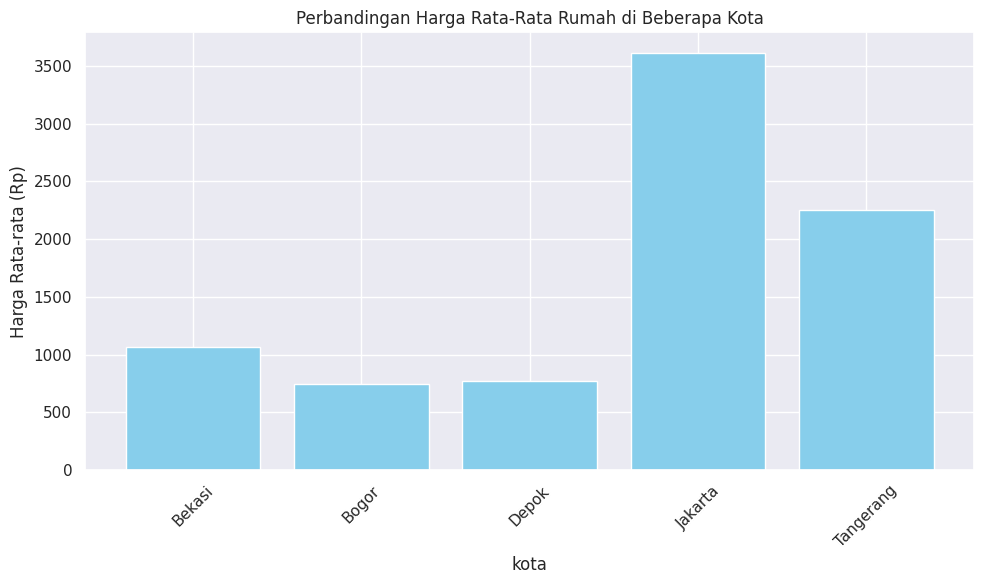

In [ ]:
# Menghitung harga rata-rata per kota
harga_rata2_per_kota = df_gab.groupby('kota')['harga'].mean().reset_index()

# Menampilkan harga rata-rata per kota
print("Harga rata-rata rumah per kota:")
print(harga_rata2_per_kota)

# Membuat visualisasi harga rata-rata per kota
plt.figure(figsize=(10, 6))
plt.bar(harga_rata2_per_kota['kota'], harga_rata2_per_kota['harga'], color='skyblue')
plt.title('Perbandingan Harga Rata-Rata Rumah di Beberapa Kota')
plt.xlabel('kota')
plt.ylabel('Harga Rata-rata (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Jakarta memiliki harga rumah tertinggi, yaitu sekitar 3.6 miliar. Ini menunjukkan bahwa Jakarta adalah kota dengan harga rumah yang jauh lebih mahal dibandingkan kota-kota lainnya. Depok dan Bogor memiliki harga yang sangat rendah, masing-masing sekitar 772 juta dan 743 juta. Ini menunjukkan bahwa rumah di kedua kota ini jauh lebih terjangkau. Tangerang dan Bekasi juga memiliki harga yang relatif tinggi dibandingkan Depok dan Tangerang, dengan harga sekitar 2.25 miliar dan 1.06 miliar, tetapi masih jauh lebih rendah daripada Jakarta.

Ada kecenderungan bahwa rumah di kota-kota besar seperti Jakarta dan Bekasi lebih mahal dibandingkan dengan kota-kota lain seperti Depok dan Tangerang, yang memiliki harga jauh lebih rendah.Secara umum, dapat disimpulkan bahwa rumah di kota-kota yang lebih besar dan lebih berkembang cenderung lebih mahal.

Dari data di atas, bisa disimpulkan bahwa terdapat perbedaan signifikan dalam harga rumah antar kota, di mana Jakarta merupakan kota dengan harga tertinggi, sedangkan Depok dan Tangerang adalah yang terendah.

###4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

Jika untuk membuat kantor cabang baru dan harga adalah acuannya, maka berdasarkan visualisasi di nomor sebelumnya kami menyarankan untuk membuka cabang baru di Bogor dan di Depok dengan alasannya masing masing sebagai berikut:

Alasan untuk membuka cabang baru di Depok:
1. Berdasarkan geografi, Depok berada di tengah kota-kota besar seperti Jakarta, sehingga akses menuju antar kota lebih terjangkau.
2. Fasilitas lebih memadai, seperti pada sektor pendidikan adanya Universitas Indonesia, selanjutan.
3. Infrastruktur transportasi seperti LRT dan akses ke pusat bisnis Jakarta menjadi salah satu daya tarik besar.

Alasan untuk membuka cabang baru di Bogor:
1. Lingkungan Alam: Bogor terkenal dengan iklim sejuk dan pemandangan alam yang hijau, membuatnya ideal untuk hunian dengan udara yang lebih bersih.
2. Bogor terkenal sebagai kota wisata, sehingga Bogor merupakan pilihan yang tepat jika pembeli ingin menyewakan villa atau tempat penginapan.
3. Dibandingkan dengan Jakarta, harga properti di Bogor relatif lebih murah, membuatnya lebih menarik bagi pembeli rumah.


**KESIMPULAN:**

Berdasarkan analisis harga dan faktor geografis, Depok dan Bogor memiliki keunggulan masing-masing sebagai lokasi potensial untuk membuka cabang baru perusahaan properti. Depok menawarkan aksesibilitas yang tinggi ke kota-kota besar seperti Jakarta, fasilitas pendidikan yang memadai, serta infrastruktur transportasi yang berkembang pesat, menjadikannya cocok untuk pasar urban. Sementara itu, Bogor dikenal dengan iklim sejuk, lingkungan alam yang hijau, dan sebagai destinasi wisata, menawarkan harga properti yang lebih terjangkau, sehingga cocok untuk hunian nyaman dan investasi properti seperti villa atau penginapan.

### 5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?

In [ ]:
df_gab.columns

Index(['LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi', 'sertifikat',
       'listrik', 'harga', 'deskripsi', 'kota'],
      dtype='object')

In [ ]:
# Kami memilih variabel 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', dan 'sertifikat'
print(df_gab['LT'].value_counts(), '\n')
print(df_gab['LB'].value_counts(), '\n')
print(df_gab['KT'].value_counts(), '\n')
print(df_gab['KM'].value_counts(), '\n')
print(df_gab['garasi'].value_counts(), '\n')
print(df_gab['sertifikat'].value_counts(), '\n')
print(df_gab['carport'].value_counts())

LT
60.0     72
72.0     43
90.0     28
84.0     21
66.0     18
         ..
290.0     1
83.0      1
432.0     1
185.0     1
145.0     1
Name: count, Length: 157, dtype: int64 

LB
36.0     42
45.0     30
70.0     22
60.0     20
90.0     19
         ..
178.0     1
311.0     1
463.0     1
410.0     1
53.0      1
Name: count, Length: 153, dtype: int64 

KT
2     237
3     205
4      70
5      47
6      13
1      13
7       6
8       3
10      2
Name: count, dtype: int64 

KM
2     218
1     211
3      98
4      39
5      23
6       5
10      2
Name: count, dtype: int64 

garasi
0    470
1     90
2     29
3      3
4      3
5      1
Name: count, dtype: int64 

sertifikat
SHM                                498
SHGB                                38
HGB                                 18
lainnya(PPJB, GIRIK, ADAT, dll)     15
SHM + IMB                            9
PPJB                                 7
Lainnya                              6
SHM,IMB                              2
SHM + IMB + PB

Berdasarkan dari kode di atas, karakteristik rumah yang paling banyak dijual adalah:

- **LT** : 60 - 72 m² (Luas Tanah)

- **LB** : 36 - 45 m² (Luas Bangunan)

- **KT** : 2 Kamar tidur

- **KM** : 2 Kamar mandi

- **garasi** : 0 garasi (tidak ada garasi)

- **sertifikat** : SHM (Surat Hak Milik)

- **carport** : 1 carport

### 6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?

In [ ]:
df_jakarta_investasi = dfJ_new[dfJ_new['harga'] <= 25000][['lokasi', 'harga', 'LT', 'LB', 'garasi', 'carport']]
print("\nData untuk Rekomendasi Investasi (Maks Rp 25 Miliar)")
df_jakarta_investasi


Data untuk Rekomendasi Investasi (Maks Rp 25 Miliar)


,lokasi,harga,LT,LB,garasi,carport
0,Jakarta Pusat,4500.0,202.0,198.0,0,0
1,Jakarta Pusat,1100.0,30.0,55.0,0,1
2,Jakarta Pusat,395.0,19.0,35.0,0,0
3,Jakarta Pusat,835.0,33.0,42.0,0,1
4,Jakarta Pusat,1100.0,30.0,55.0,0,1
...,...,...,...,...,...,...
98,Jakarta Timur,3850.0,220.0,239.0,1,2
99,Jakarta Timur,880.0,70.0,57.0,0,2
100,Jakarta Timur,4300.0,315.0,280.0,1,2
101,Jakarta Timur,3400.0,135.0,190.0,0,2


Rekomendasi untuk

- Jakarta Pusat:

  - Harga: 4.5 M

  - LT: 202 m²

  - LB: 198 m²

  - Potensi: Berada di pusat kota

-  Jakarta Selatan:

  - Harga: 15 M

  - LT: 1000 m²

  - LB: 450 m²

  - Potensi: Banyaknya tempat wisata dan pendidikan yang mumpuni

- Jakarta Utara:
  - Harga: 4.85 M

  - LT: 160 m²

  - LB: 275 m²

  - Potensi: harga tanah yang tidak setinggi kawasan Jakarta Selatan

- Jakarta Barat:
  - Harga: 2.4 M

  - LT: 85 m²

  - LB: 180 m²

  - Potensi: stabilnya pengembangan proyek properti

- Jakarta Timur:
  - Harga: 4.2 M

  - LT: 232 m²

  - LB: 300 m²

  - Potensi: potensi investasi properti cukup tinggi jika dibandingkan wilayah lainnya


In [ ]:
df_depok_investasi = dfD_new[dfD_new['harga'] <= 25000][['lokasi', 'harga', 'LT', 'LB', 'garasi', 'carport']]
print("\nData untuk Rekomendasi Investasi (Maks Rp 25 Miliar)")
df_depok_investasi


Data untuk Rekomendasi Investasi (Maks Rp 25 Miliar)


,lokasi,harga,LT,LB,garasi,carport
0,Cipayung,250.0,50.0,45.0,0,0
1,Sawangan,250.0,50.0,36.0,0,1
2,Cimanggis,250.0,50.0,45.0,0,0
3,Sawangan,350.0,72.0,45.0,0,1
4,Cipayung,130.0,40.0,30.0,0,0
...,...,...,...,...,...,...
94,Sukmajaya,750.0,79.0,115.0,1,1
95,Cimanggis,1000.0,72.0,45.0,0,1
96,Cipayung,195.0,40.0,40.0,0,0
97,Cipayung,185.0,50.0,50.0,0,0


In [ ]:
print(dfD_new['lokasi'].value_counts())

lokasi
Sawangan        24
Cimanggis       23
Tapos           11
Cipayung         9
Cinere           8
Pancoran Mas     7
Sukmajaya        7
Beji             5
Cilodong         3
Bojong Sari      1
Limo             1
Name: count, dtype: int64


Rekomendasi untuk:
- Sawangan
  - Harga: 350 jt
  - LT: 71 m²
  - LB: 45 m²
  - potensi: lokasi strategis
- Tapos
  - Harga: 565 jt
  - LT: 62 m²
  - LB: 63 m²
  - potensi: harganya yang terjangkau

- Cimanggis
  - Harga: 1.28 M
  - LT: 120 m²
  - LB: 103 m²
  - potensi: terdapat potensi kenaikan garga properti

In [ ]:
df_bogor_investasi = dfB_new[dfB_new['harga'] <= 25000][['lokasi', 'harga', 'LT', 'LB', 'garasi', 'carport']]
print("\nData untuk Rekomendasi Investasi (Maks Rp 25 Miliar)")
df_bogor_investasi


Data untuk Rekomendasi Investasi (Maks Rp 25 Miliar)


,lokasi,harga,LT,LB,garasi,carport
0,Bojonggede,692.55,75.0,38.0,1,1
1,Babakan Madang,811.40,60.0,40.0,0,1
2,Babakan Madang,900.50,60.0,50.0,0,1
3,Babakan Madang,1001.90,60.0,70.0,0,1
4,Babakan Madang,1200.80,90.0,60.0,0,2
...,...,...,...,...,...,...
169,Gunung Putri,440.55,90.0,36.0,0,1
170,Sukaraja,408.65,107.0,31.0,0,1
171,Bogor Selatan,1200.00,210.0,150.0,1,1
172,Cileungsi,440.55,90.0,36.0,0,1


In [ ]:
print(dfB_new['lokasi'].value_counts())

lokasi
Gunung Putri      21
Parung            20
Babakan Madang    16
Bogor Barat       16
Bojonggede        12
Cibinong          12
Bogor Utara       11
Cileungsi         10
Jonggol            7
Gunungsindur       6
Ciomas             6
Tanah Sareal       6
Bogor Selatan      5
Tajurhalang        4
Ciseeng            3
Bogor Timur        3
Sukaraja           3
Ciampea            2
Rumpin             2
Parung Panjang     2
Ranca Bungur       1
Dramaga            1
Megamendung        1
Kemang             1
Cipanas            1
Bogor Tengah       1
Tenjo              1
Name: count, dtype: int64


Rekomendasi Properti:

- Gunung Putri
  - Harga: Rp 617.000.000
  - LT: 72 m²
  - LB: 33 m²
  - Potensi Keuntungan: Lokasi yang menarik dan harga yang kompetitif.

- Bojonggede
  - Harga: Rp 692.550.000
  - LT: 75 m²
  - LB: 38 m²
  - Potensi Keuntungan: Area yang berkembang dan harga yang masih terjangkau.
  
- Babakan Madang
  - Harga: Rp 811.400.000
  - LT: 60 m²
  - LB: 40 m²
  - Potensi Keuntungan: Terkenal sebagai kawasan berkembang dengan fasilitas yang baik.

In [ ]:
df_tangerang_investasi = dfT_new[dfT_new['harga'] <= 25000][['lokasi', 'harga', 'LT', 'LB', 'garasi', 'carport']]
print("\nData untuk Rekomendasi Investasi (Maks Rp 25 Miliar)")
df_tangerang_investasi


Data untuk Rekomendasi Investasi (Maks Rp 25 Miliar)


,lokasi,harga,LT,LB,garasi,carport
0,"BSD CITY, TANGERANG",500.0,60.0,50.0,0,0
1,"CISAUK, TANGERANG",480.0,72.0,54.0,1,1
2,"CILEDUG, TANGERANG",600.0,60.0,48.0,2,2
3,"LIPPO KARAWACI, TANGERANG",4250.0,200.0,225.0,0,0
4,"PONDOK CABE, TANGERANG",1700.0,76.0,123.0,0,2
...,...,...,...,...,...,...
109,"LIPPO KARAWACI, TANGERANG",711.0,60.0,55.0,0,1
110,"Ciater, Tangerang",850.0,66.0,70.0,0,1
111,"BSD Griya Loka, Tangerang",1860.0,202.0,85.0,1,1
112,"Pagedangan, Tangerang",1800.0,108.0,130.0,1,1


In [ ]:
print(dfT_new['lokasi'].value_counts())

lokasi
BSD, TANGERANG                      23
BSD CITY, TANGERANG                 19
GADING SERPONG, TANGERANG            8
CISAUK, TANGERANG                    7
BSD THE ICON, TANGERANG              6
CIPONDOH, TANGERANG                  3
PONDOK CABE, TANGERANG               3
LIPPO KARAWACI, TANGERANG            3
CILEDUG, TANGERANG                   3
CIKUPA CITRA JAYA, TANGERANG         3
BSD PUSPITA LOKA, TANGERANG          2
BANJAR WIJAYA, TANGERANG             2
BSD THE GREEN, TANGERANG             2
ALAM SUTERA, TANGERANG               2
BSD EMINENT, TANGERANG               2
BSD NUSALOKA, TANGERANG              2
BSD DELATINOS, TANGERANG             2
BSD PROVANCE PARKLAND, TANGERANG     1
MAUK, TANGERANG                      1
SEPATAN, TANGERANG                   1
RAWAKALONG, TANGERANG                1
Poris, Tangerang                     1
Pagedangan, Tangerang                1
PONDOK JAGUNG, TANGERANG             1
BENDA, TANGERANG                     1
PINANG, TANGERANG 

Rekomendasi untuk:
- BSD,  TANGERANG:
  - Harga: 1.26 M
  - LT: 276 m²
  - LB: 441 m²
  - Potensi Keuntungan: Nilai properti di BSD cenderung meningkat seiring waktu. Hal ini didukung oleh permintaan yang tinggi.

- BSD CITY, TANGERANG:
  - Harga: 4.7 M
  - LT: 300 m²
  - LB: 400 m²
  - Potensi Keuntungan: BSD City memiliki akses mudah ke berbagai titik penting di Jabodetabek, termasuk Jakarta.

- GADING SERPONG, TANGERANG:
  - Harga: 4.5 M
  - LT: 375 m²
  - LB: 350 m²
  - Potensi Keuntungan: Gading Serpong dikenal dengan infrastruktur yang baik dan fasilitas yang lengkap.
  

In [ ]:
df_bekasi_investasi = dfX2[dfX2['harga'] <= 25000][['lokasi', 'harga', 'LT', 'LB', 'garasi', 'carport']]
print("\nData untuk Rekomendasi Investasi (Maks Rp 25 Miliar)")
df_bekasi_investasi


Data untuk Rekomendasi Investasi (Maks Rp 25 Miliar)


,lokasi,harga,LT,LB,garasi,carport
0,Kabupaten Bekasi,550.0,71.0,43.0,0,1
1,Kabupaten Bekasi,440.0,59.0,60.0,0,1
2,Kabupaten Bekasi,699.0,124.0,95.0,0,1
3,Kabupaten Bekasi,1350.0,144.0,100.0,0,1
4,Kabupaten Bekasi,1400.0,108.0,100.0,0,1
...,...,...,...,...,...,...
101,Kota Bekasi,1600.0,180.0,220.0,0,0
102,Kabupaten Bekasi,850.0,140.0,250.0,0,0
103,Kabupaten Bekasi,250.0,60.0,55.0,0,0
104,Kabupaten Bekasi,300.0,36.0,60.0,0,0


Rekomendasi untuk daerah Bekasi berdasarkan data, sebagai berikut:

- Kabupaten Bekasi
  - Harga: 1.3 M
  - LT: 153 m²
  - LB: 180 m²
  - potensi: dekat dengan kawasan industri yang teringrasi, akses transportasi memadai.
- Kota Bekasi
  - Harga: 2.3 M
  - LT: 200 m²
  - LB: 250 m²
  - potensi: segi infrastruktur yang baik (kereta cepat, LRT, jalan tol, dll), dikenal sebagai salah satu pusat industri terbesar di Indonesia.

### 7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

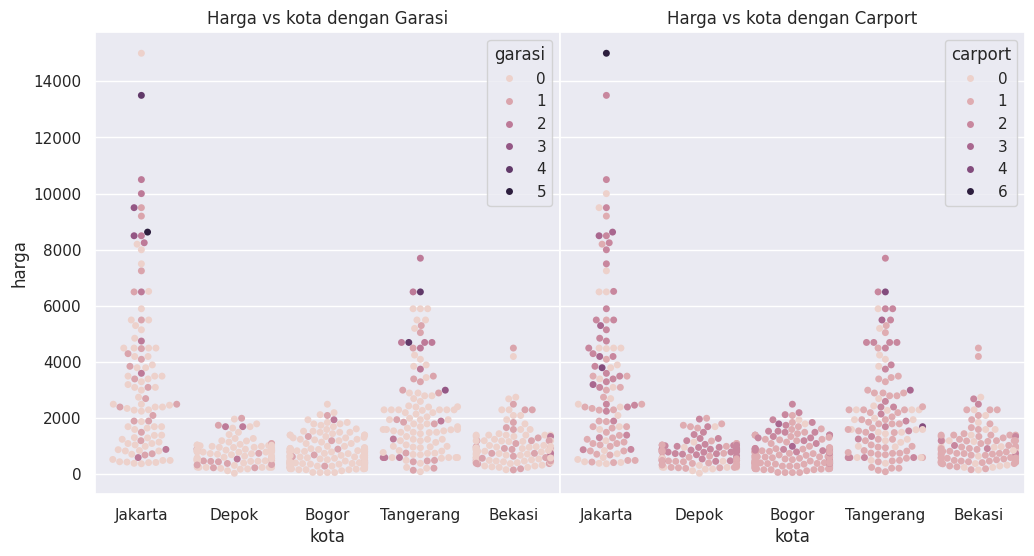

In [ ]:
# Membuat figure dengan 2 subplot yang sejajar (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot pertama: hubungan antara 'kota', 'harga', dan 'garasi'
sns.swarmplot(x="kota", y="harga", hue="garasi", data=df_gab, ax=axes[0])
axes[0].set_title("Harga vs kota dengan Garasi")

# Plot kedua: hubungan antara 'kota', 'harga', dan 'carport'
sns.swarmplot(x="kota", y="harga", hue="carport", data=df_gab, ax=axes[1])
axes[1].set_title("Harga vs kota dengan Carport")

# Menghapus jarak di antara plot
plt.subplots_adjust(wspace=0)

# Menampilkan plot
plt.show()

Berdasarkan visualisasi yang telah kami lakukan bahwa tidak terdapat perbedaan/pengaruh harga yang signifikan antara harga rumah yang memiliki carport maupun garasi.

Keduanya hampir memiliki rentang harga rumah yang serupa, tetapi kami merekomendasikan untuk memilih rumah dengan garasi, dibandingkan dengan carport. Ada beberapa asumsi atas rekomendasi tersebut, yaitu:

1.   Perbedaan nya garasi lebih melindungi kendaraan dari elemen cuaca, pencurian, dan bisa menjadi tempat ruang kerja serta penyimpanan barang.
2.   Sementara carport hanya melindungi dari elemen cuaca saja, karena sifatnya terbuka daengan penutup dibagian atas.

Dari hal-hal tersebut, kami kembalikan lagi tergantung pada kebutuhan, preferensi pribadi seperti apa yang diinginkan.

[link text](https://www.rumahmaterial.com/2023/05/garasi-atau-carport-apa-bedanya.html)



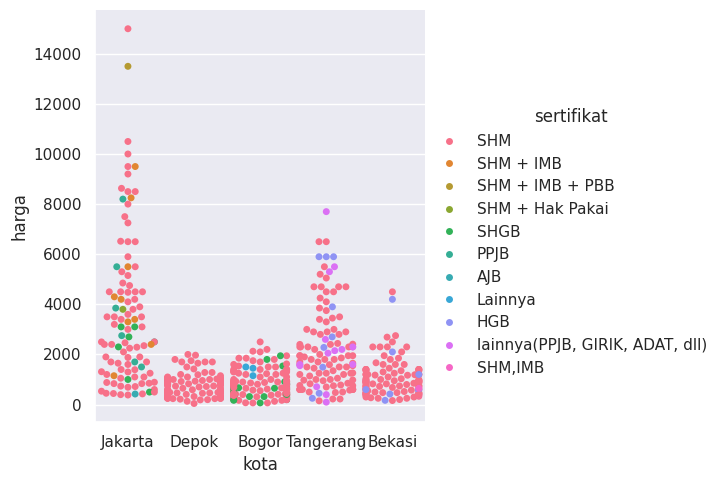

In [ ]:
V2 = sns.catplot(x = "kota", y = "harga", hue = 'sertifikat', kind = 'swarm', data = df_gab)

Berdasarkan visualisasi diatas, terlihat bahwa perbedaan jenis sertifikat rumah yang itu memiliki beberapa macam jenisnya, yaitu:

1.   HGB (Hak Guna Bangunan)
2.   SHM (Sertifikat Hak Milik), dan
3.   SHM, IMB (Izin Mendirikan Bangunan), dll

Dapat dilihat sertifikat rumah dengan jenis SHM lebih dominan, dibandingkan dengan yang lain. Sehingga kami merekomendasikan untuk lebih memilih sertifikat SHM sebagai investasi.
Alasan kami menyampaikan hal tersebut, karena

*   Sertifikat Hak Milik (SHM) memiliki posisi hukum yang paling kuat dibandingkan jenis sertifikat lainnya.
*   SHM berlaku seumur hidup dan bisa diwariskan atau dialihkan kepada pihak lain. Dengan karakteristik tersebut, properti dengan sertifikat SHM sangat ideal untuk dijadikan investasi jangka panjang (cenderung memiliki nilai yg lebih tinggi dan lebih stabil seiring waktu).
*   Selain itu, properti dengan status SHM juga memiliki nilai lebih karena dapat dijadikan jaminan atau agunan dalam proses pengajuan kredit perbankan.

[link text](https://www.medcom.id/properti/news-properti/nN92d6eb-jenis-jenis-sertifikat-tanah-dan-rumah/)

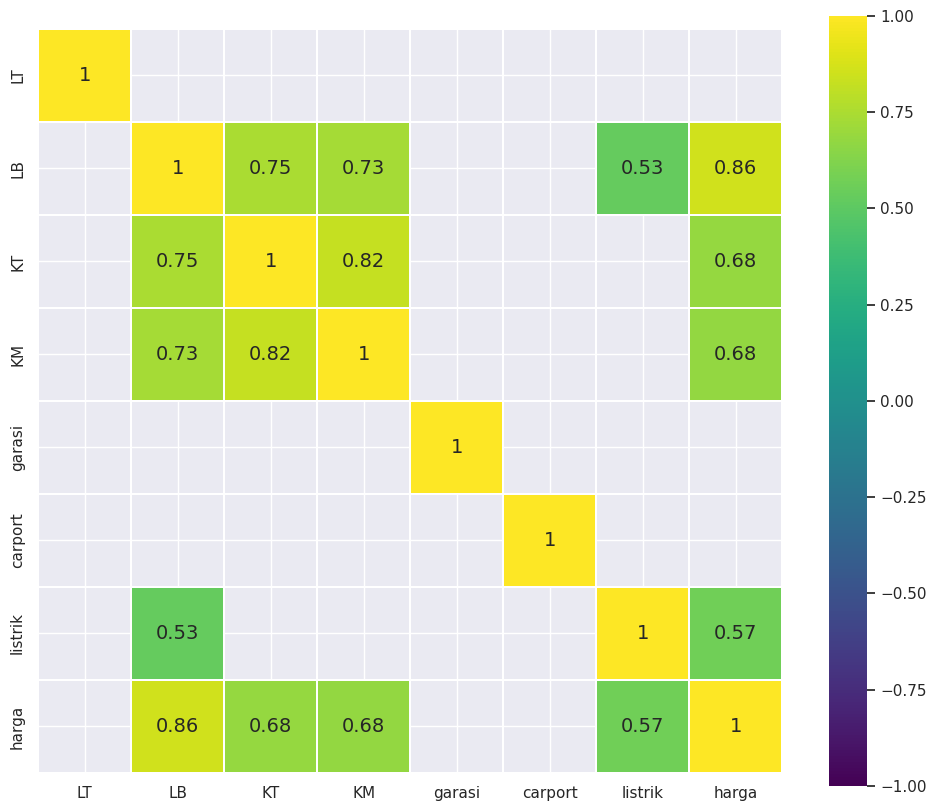

In [ ]:
# Memilih subset kolom yang akan dianalisis
cols_to_analyze = ['LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'listrik', 'harga']

# Menghitung korelasi untuk subset kolom
corr_subset = df_gab[cols_to_analyze].corr()

# Membuat heatmap untuk korelasi di antara variabel yang dipilih
plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset[(corr_subset >= 0.5) | (corr_subset <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True)

# Menampilkan heatmap
plt.show()

Berdasarkan output heatmap yang telah kami analisis, berikut adalah interpretasi korelasi antar variabel:

*   Variabel Harga dengan Luas Tanah (LT) dan Luas Bangunan (LB)

  1.   Luas Tanah (LT) memiliki korelasi yang tinggi terhadap harga dengan nilai korelasi mencapai 1.
  2.   Luas Bangunan (LB) juga menunjukkan korelasi yang kuat terhadap harga, dengan nilai korelasi 0.86.

    Hal ini menunjukkan bahwa properti dengan ukuran tanah dan bangunan yang lebih besar cenderung memiliki harga yang lebih tinggi.

*   Variabel Harga dengan Variabel Lainnya

  1.   Jumlah Kamar Mandi (KM) memiliki korelasi moderat dengan harga (0.68), menunjukkan bahwa properti dengan lebih banyak kamar mandi cenderung memiliki harga lebih tinggi.
  2.   Jumlah Kamar Tidur (KT) memiliki korelasi yang sama terhadap harga (0.68).
  3.   Listrik juga memiliki korelasi yang lumayan kuat dengan harga (0.57), menunjukkan bahwa daya listrik yang lebih besar mungkin menandakan properti dengan fasilitas atau ukuran yang lebih besar.
  4.   Garasi dan carport memiliki korelasi rendah dengan harga, menunjukkan bahwa kapasitas garasi atau carport tidak memiliki pengaruh besar terhadap nilai properti.

**Kesimpulan**


Kami sebagai data analyst merekomendasikan agar mempertimbangkan faktor-faktor berikut kepada investor:

1.   **Prioritaskan Properti dengan Sertifikat Hak Milik (SHM)**:

    Properti dengan sertifikat SHM memiliki posisi hukum yang kuat dan cocok untuk investasi jangka panjang, sebagaimana dijelaskan sebelumnya.

2.   **Fokus pada Variabel dengan Luas Tanah dan Bangunan yang Besar**:

    Mengingat korelasi yang kuat antara luas tanah (LT) dan luas bangunan (LB) dengan harga, properti dengan kedua karakteristik ini cenderung memberikan pengembalian investasi yang lebih baik dalam jangka panjang. Investor dapat mempertimbangkan properti dengan luas tanah dan bangunan yang lebih besar sebagai aset yang lebih likuid dan bernilai tinggi.

3.   **Fasilitas Tambahan Dapat Menambah Nilai**:

    Meskipun garasi dan carport memiliki korelasi rendah terhadap harga, fasilitas tambahan seperti listrik dengan kapasitas besar memiliki korelasi yang signifikan. Properti dengan kapasitas listrik yang lebih tinggi dapat menawarkan potensi untuk modernisasi atau pengembangan lebih lanjut yang dapat meningkatkan nilai properti.

4.   **Perhatikan Kombinasi Variabel Properti**:

    Properti yang memiliki jumlah kamar mandi (KM) dan kamar tidur (KT) yang lebih banyak cenderung lebih menarik bagi keluarga besar atau segmen pasar yang mencari hunian premium. Meskipun korelasinya tidak sekuat luas tanah atau bangunan, fitur ini tetap dapat meningkatkan daya tarik properti bagi pembeli potensial.

Untuk investasi properti jangka panjang, properti dengan luas tanah dan bangunan yang besar, disertai dengan sertifikat SHM, adalah pilihan yang ideal. Fasilitas tambahan seperti daya listrik yang tinggi juga dapat menjadi nilai tambah. Meskipun garasi dan carport tidak menunjukkan korelasi yang kuat dengan harga, tetap perlu dipertimbangkan dalam penilaian keseluruhan properti.